# Análise exploratória de dados em dataset de veículos disponibilizado pelo kaggle

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
#Leitura do dataset
path = "datasets/autos.csv"
df = pd.read_csv(path,encoding="latin-1")

#Permitir visualizar todas as colunas
pd.options.display.max_columns = None

In [5]:
#Breve visualização do que se encontra no dataset
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [33]:
#Checando a informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

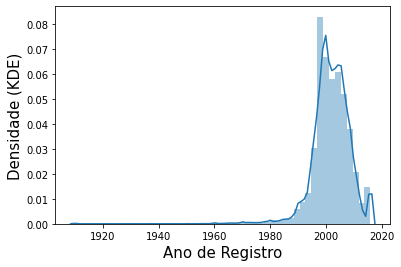

In [5]:
#Plotando o histograma referente ao ano de registro do veículo
#Observa-se que a maioria dos veículos se encontra com o ano de registro entre 1990 e 2018

f, ax = plt.subplots(figsize=(6, 4))

data = df["yearOfRegistration"]

sns.distplot(data, ax=ax, kde=True)

plt.ylabel("Densidade (KDE)", fontsize=15)
plt.xlabel("Ano de Registro", fontsize=15)

plt.show()

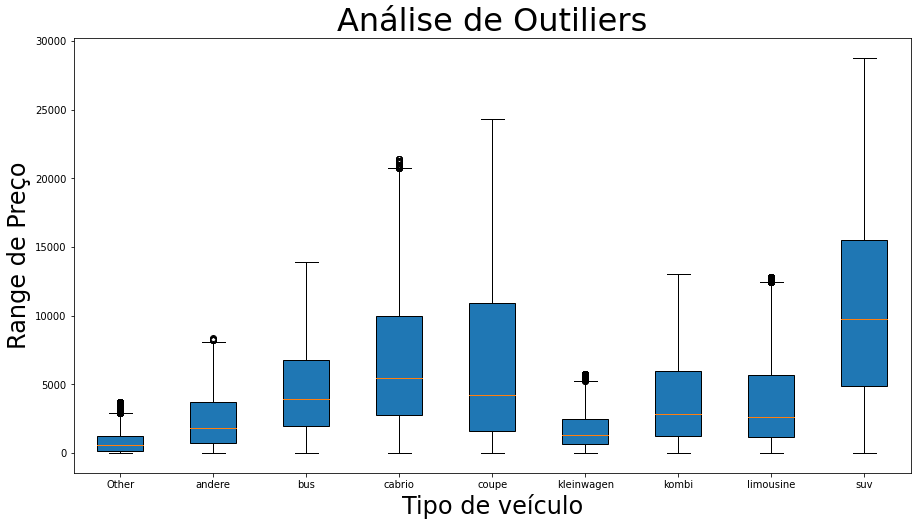

In [34]:
#Boxplot do preço do veículos de acordo com o tipo de veículo
#Observa-se que os tipos Other, Andere, Cabrio, Kleinwagen e limousine apresentam outliers, mas não tão discrepantes
#em relação ao limite superior do box plot.

data = df[["price","vehicleType"]]

gps = data.set_index("price").groupby(["vehicleType"]).groups

fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(gps.values(), vert=True, patch_artist=True, labels = gps.keys())

ax.set_title("Análise de Outiliers", fontsize=32)
ax.set_xlabel("Tipo de veículo", fontsize=24)
ax.set_ylabel("Range de Preço", fontsize=24)

plt.show()

limousine     84077
kleinwagen    69334
kombi         60195
bus           26833
cabrio        20388
Other         19447
coupe         16920
suv           13585
andere         2908
Name: vehicleType, dtype: int64


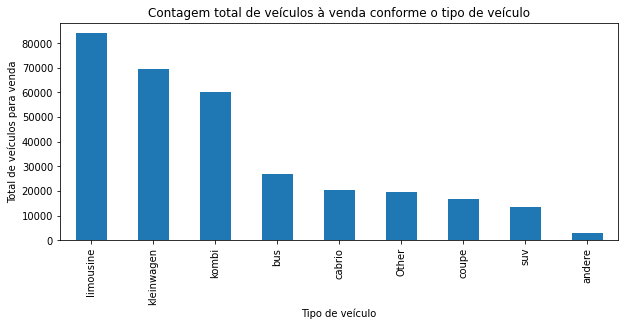

In [13]:
#Count plot em relação a quantidade de veículos à venda de acordo com o tipo de veículo
#Observa-se uma maior quantidade de veículos do tipo limousine seguido kleinwagen

data = df["vehicleType"].value_counts()

print(data)

ax = data.plot(kind="bar", figsize=(10,4), title="Contagem total de veículos à venda conforme o tipo de veículo")

ax.set_xlabel("Tipo de veículo")
ax.set_ylabel("Total de veículos para venda")

plt.show()

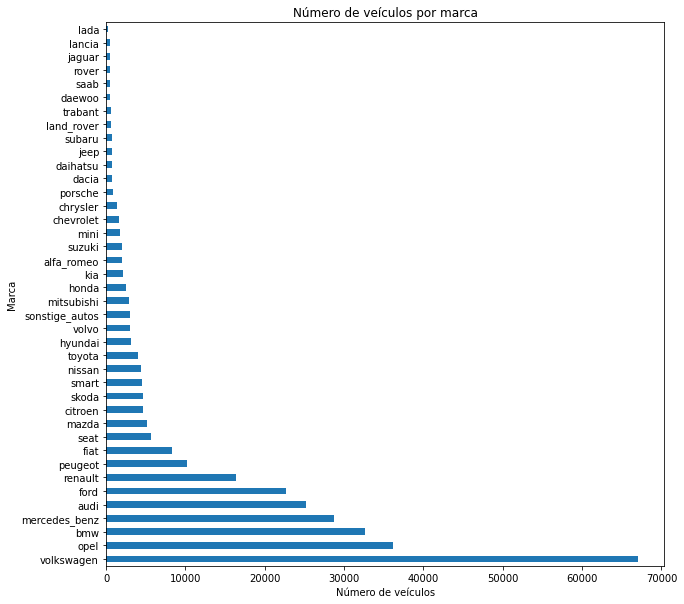

In [14]:
#Count plot em relação ao número de veículos à venda em relação a marca do veículo
#Observa-se uma maior presença de veículos da marca volkswagen

data = df["brand"].value_counts()

ax = data.plot(kind="barh", figsize=(10,10), title="Número de veículos por marca")

ax.set_xlabel("Número de veículos")
ax.set_ylabel("Marca")

plt.show()

[637.746375811128, 1234.450892857143, 3483.1636597938145, 4758.811678832117, 4861.688699360341, 1510.675239037257, 2549.287302516091, 2645.5730720068173, 6073.769005847953]


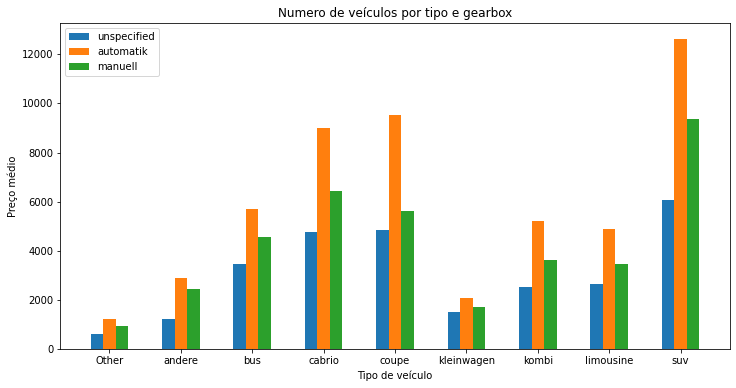

In [21]:
#Plot bar do preço médio dos veículos de acordo com o tipo de veículos e pela caixa de câmbio
#Nota-se o maior preço no véiculos do tipo SUV sendo o automático com maior média

data = df[["vehicleType","gearbox","price"]].groupby(["vehicleType","gearbox"]).mean()

labels = [ x[0] for x in data.index[::3] ]

unspecified = [ x[0] for x in data.xs('Unspecified',level=1).values]
automatik = [ x[0] for x in data.xs('automatik',level=1).values]
manuell = [ x[0] for x in data.xs('manuell',level=1).values]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig,ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - width/2, unspecified , width/2, label='unspecified')
rects2 = ax.bar(x, automatik, width/2, label='automatik')
rects3 = ax.bar(x + width/2, manuell, width/2, label='manuell')

ax.set_ylabel('Preço médio')
ax.set_xlabel('Tipo de veículo')
ax.set_title('Numero de veículos por tipo e gearbox')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

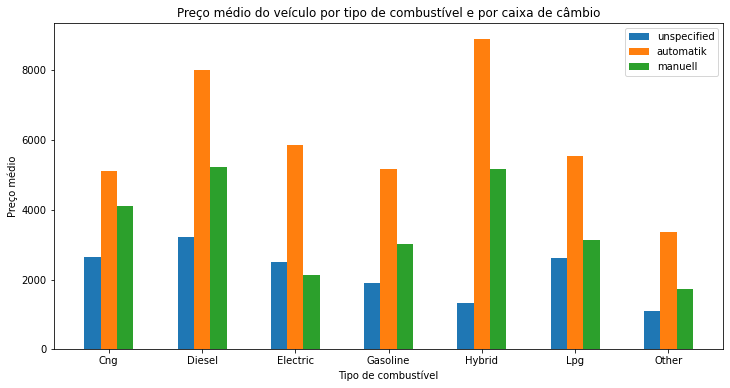

In [22]:
#Plot bar do preço médio dos veículos de acordo com o tipo de combustível e pela caixa de câmbio
#Nota-se o maior preço nos véiculos híbridos automáticos e veículos diesel manuais sendo próximo ao do híbrido

data = df[["fuelType","gearbox","price"]].groupby(["fuelType","gearbox"]).mean()

labels = [ x[0] for x in data.index[::3] ]

unspecified = [ x[0] for x in data.xs("Unspecified", level=1).values ]
automatik = [ x[0] for x in data.xs("automatik", level=1).values ]
manuell = [ x[0] for x in data.xs("manuell", level=1).values ]

x = np.arange(len(labels))
width = 0.35

fig , ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, unspecified, width/2, label="unspecified")
ax.bar(x , automatik, width/2, label="automatik")
ax.bar(x + width/2, manuell, width/2, label="manuell")

ax.set_title("Preço médio do veículo por tipo de combustível e por caixa de câmbio")
ax.set_ylabel("Preço médio")
ax.set_xlabel("Tipo de combustível")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

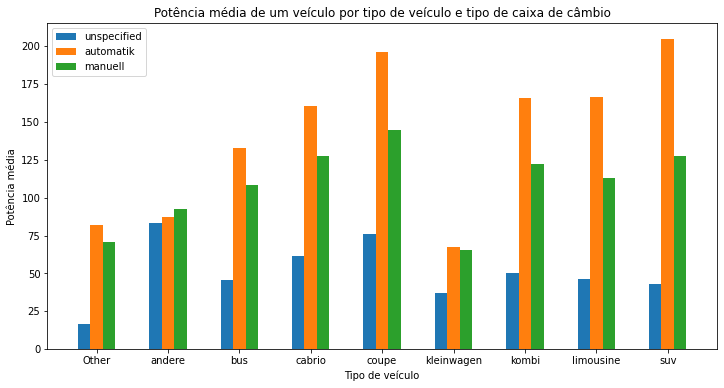

In [39]:
#Plot bar da potência média dos veículos de acordo com o tipo de veículo e pela caixa de câmbio
#Observa-se o SUV automático obtendo a maior média e dentre os manuais o tipo coupe possui maior média  

data = df[["vehicleType","gearbox","powerPS"]].groupby(["vehicleType","gearbox"]).mean()

labels = [ x[0] for x in data.index[::3] ]

unspecified = [ x[0] for x in data.xs("Unspecified", level=1).values ]
automatik = [ x[0] for x in data.xs("automatik", level=1).values ]
manuell = [ x[0] for x in data.xs("manuell", level=1).values ]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, unspecified, width/2, label="unspecified")
ax.bar(x , automatik, width/2, label="automatik")
ax.bar(x + width/2, manuell, width/2, label="manuell")

ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio")
ax.set_ylabel("Potência média")
ax.set_xlabel("Tipo de veículo")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [45]:
#Preço médio do veículo por marca e tipo de veículo

data = df[["price","vehicleType","brand"]].groupby(["brand","vehicleType"]).mean()

data.T

brand        alfa_romeo                                                \
vehicleType       Other andere       cabrio        coupe   kleinwagen   
price        669.805556  962.5  7035.727778  5265.458874  1867.865248   

brand                                             audi                       \
vehicleType       kombi    limousine  suv        Other       andere     bus   
price        3312.96868  2600.240964  0.0  1012.599251  2685.311828  3485.0   

brand                                                                          \
vehicleType       cabrio         coupe   kleinwagen        kombi    limousine   
price        9655.285628  11242.325869  2582.206074  5442.982216  3829.821096   

brand                             bmw                                    \
vehicleType           suv       Other       andere     bus       cabrio   
price        18644.243902  896.748086  1720.388393  4064.0  8613.779584   

brand                                                                         \
vehicleType        coupe  kleinwagen        kombi    limousine           suv   
price        6375.995227  1575.31307  5030.383186  4838.119115  12868.142412   

brand          chevrolet                                                       \
vehicleType        Other       andere          bus        cabrio        coupe   
price        1250.135593  3059.590909  5188.013699  10590.294118  9991.757895   

brand                                                              chrysler  \
vehicleType   kleinwagen        kombi    limousine          suv       Other   
price        2588.882239  4143.609524  4944.031818  9613.550505  915.701299   

brand                                                                    \
vehicleType       andere          bus       cabrio   coupe   kleinwagen   
price        2919.714286  2395.083333  4160.719665  8194.0  1666.444444   

brand                                                  citroen               \
vehicleType        kombi    limousine          suv       Other       andere   
price        3930.567686  3191.585455  5888.391304  912.367647  2248.972727   

brand                                                                        \
vehicleType          bus       cabrio        coupe  kleinwagen        kombi   
price        4036.490718  4536.408696  2695.552632  2274.68358  3101.815182   

brand                                      dacia                       \
vehicleType    limousine           suv     Other  andere          bus   
price        3379.148256  10810.540541  1674.875  3560.0  8370.729167   

brand                                                                daewoo  \
vehicleType   kleinwagen        kombi    limousine          suv       Other   
price        3276.289474  4166.642857  3260.578431  9761.972093  664.204082   

brand                                                                     \
vehicleType andere          bus cabrio    coupe   kleinwagen       kombi   
price        993.8  1262.777778  900.0  428.625  1110.324627  816.340426   

brand                              daihatsu                          \
vehicleType   limousine     suv       Other  andere     bus  cabrio   
price        983.981308  1900.0  614.675676  1075.0  1201.5  7761.0   

brand                                                                  fiat  \
vehicleType   kleinwagen        kombi    limousine          suv       Other   
price        1402.864245  3420.294118  3329.543478  2066.918367  807.092511   

brand                                                                         \
vehicleType       andere          bus       cabrio        coupe   kleinwagen   
price        2639.846154  3372.793827  6315.888676  3058.112994  1712.308871   

brand                                                ford               \
vehicleType        kombi    limousine     suv       Other       andere   
price        1817.042506  2262.702341  8527.0  693.239709  2142.111111   

brand                                       

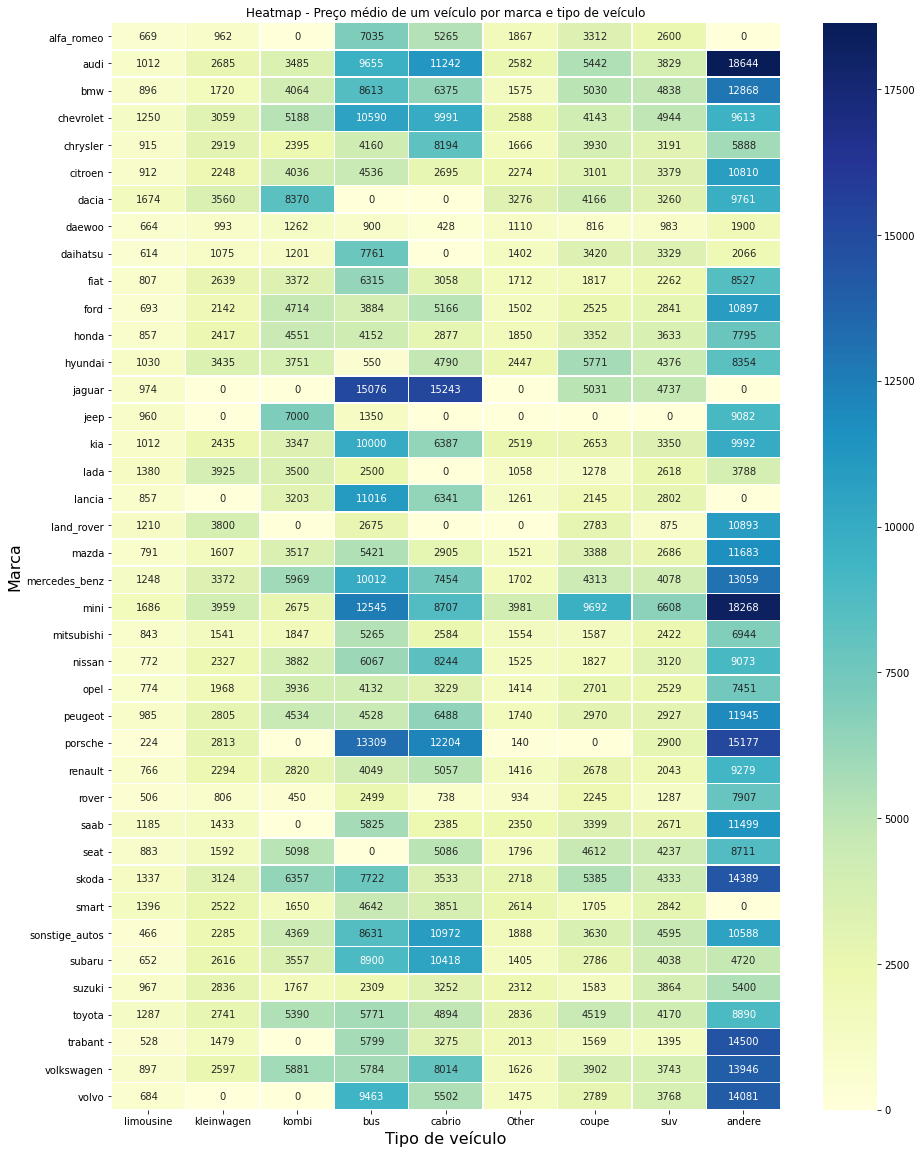

In [59]:
#Heatmap do preço médio do veículo por marca e tipo de veículo

tipos = df['vehicleType'].value_counts().index
marcas = df['brand'].value_counts().index.sort_values()

dataFrame = df[["price","vehicleType","brand"]]

data = dataFrame.groupby(["brand","vehicleType"]).mean()

novos_dados = []
labels = ["price","vehicleType","brand"]

for marca in marcas:
    tipos_marca = data.xs(marca, level=0).index
    
    for tipo in tipos:
        if tipo not in tipos_marca:
            novos_dados.append([0,tipo,marca])
            
df2 = pd.DataFrame(novos_dados, columns=labels)
            
new_dataFrame = dataFrame.append(df2)

ndf = new_dataFrame.groupby(["brand","vehicleType"]).mean()

dados = []

for marca in marcas:
    lst = [ int(x[0]) for x in ndf.xs(marca,level=0).values ]
    dados.append(lst)
    
fig, ax = plt.subplots(figsize=(15,20))
                      
ax = sns.heatmap(dados, annot=True, cmap="YlGnBu", xticklabels=tipos, yticklabels=marcas, linewidths=.5, fmt='g')

ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo", fontsize=12)
ax.set_xlabel("Tipo de veículo", fontsize=16)
ax.set_ylabel("Marca", fontsize=16)

plt.show()
